In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import mysql.connector
from mysql.connector import Error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_connection():
    try:
        connection = mysql.connector.connect(
            host='localhost',
            user='root',
            password='sivara123',
            database='sql_project'
        )
        return connection
    except Error as e:
        print("❌ Connection failed:", e)
        return None

In [4]:
connection = get_connection()

if connection:
    print("✅ MySQL connection successful!")
    query = "SELECT * FROM engineering_enrollment;"
    df = pd.read_sql(query, connection)
    connection.close()
    print("✅ Data imported successfully from MySQL!\n")
else:
    print("❌ Could not connect to MySQL. Please check credentials.")
    df = pd.DataFrame()  # empty fallback

print(df.head())

✅ MySQL connection successful!
✅ Data imported successfully from MySQL!

   enrollment_id  student_id      student_name student_department  course_id  \
0           1000         215    Kimberly Gomez   Computer Science          1   
1           1001          37       Carmen Howe         Electrical         15   
2           1002         186      Nathan Lynch         Electrical         10   
3           1004          28   Nicholas Walker   Computer Science         13   
4           1005           5  Jessica Anderson        Electronics          4   

           course_name course_department enrollment_date grade  
0      Data Structures  Computer Science      2024-12-04     C  
1     Embedded Systems       Electronics      2025-06-02     F  
2  Structural Analysis             Civil      2024-04-12     b  
3  Digital Electronics       Electronics      2025-01-03     b  
4       Thermodynamics        Mechanical      2024-06-29     c  


In [5]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   enrollment_id       601 non-null    int64 
 1   student_id          601 non-null    int64 
 2   student_name        601 non-null    object
 3   student_department  601 non-null    object
 4   course_id           601 non-null    int64 
 5   course_name         601 non-null    object
 6   course_department   601 non-null    object
 7   enrollment_date     601 non-null    object
 8   grade               601 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.4+ KB
None


In [6]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 enrollment_id         0
student_id            0
student_name          0
student_department    0
course_id             0
course_name           0
course_department     0
enrollment_date       0
grade                 0
dtype: int64


In [7]:
grade_map = {'A':5, 'B':4, 'C':3, 'D':2, 'F':1}
df['grade_numeric'] = df['grade'].map(grade_map)

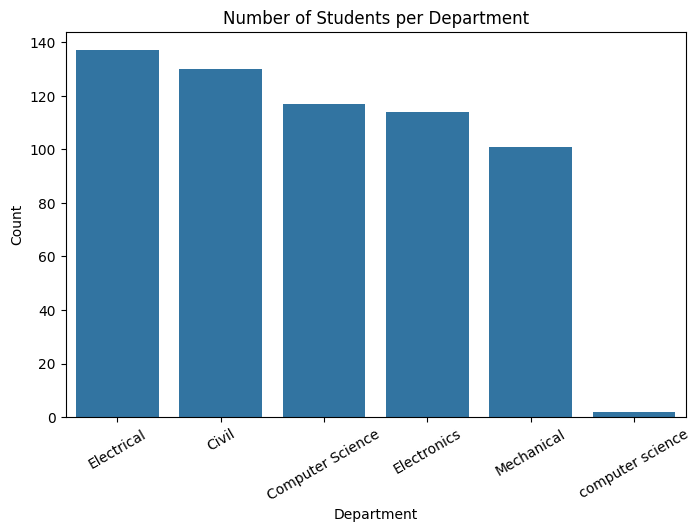

In [8]:
plt.figure(figsize=(8,5))
dep_count = df['student_department'].value_counts()
sns.barplot(x=dep_count.index, y=dep_count.values)
plt.title('Number of Students per Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

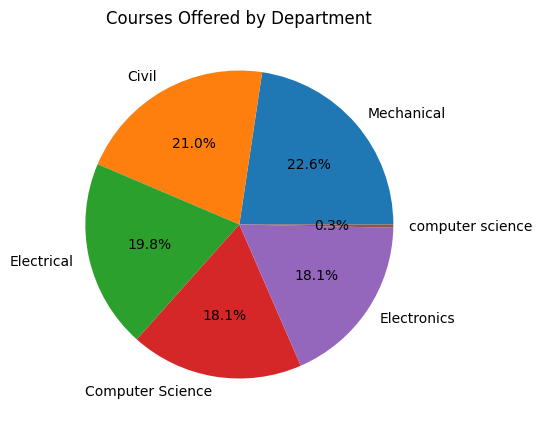

In [9]:
plt.figure(figsize=(8,5))
course_count = df['course_department'].value_counts()
plt.pie(course_count.values, labels=course_count.index, autopct='%1.1f%%')
plt.title('Courses Offered by Department')
plt.show()

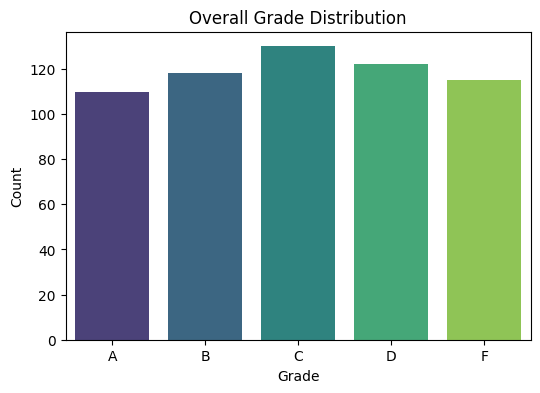

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='grade', data=df, order=['A','B','C','D','F'], palette='viridis')
plt.title('Overall Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

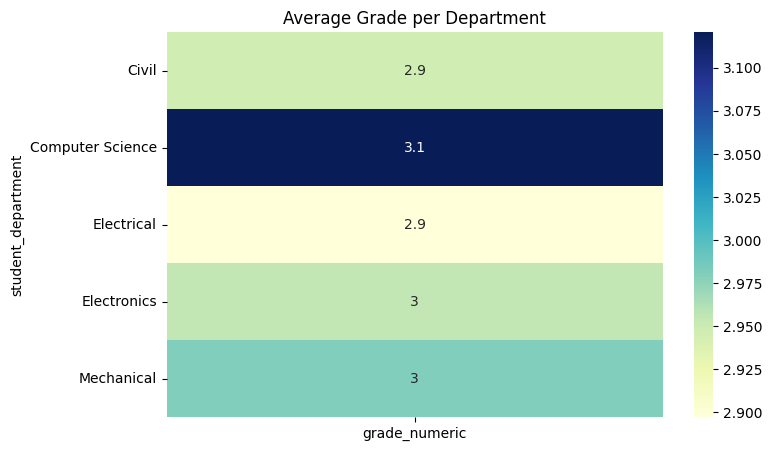

In [11]:
plt.figure(figsize=(8,5))
avg_grade = df.groupby('student_department')['grade_numeric'].mean().reset_index()
sns.heatmap(avg_grade.pivot_table(values='grade_numeric', index='student_department'), annot=True, cmap='YlGnBu')
plt.title('Average Grade per Department')
plt.show()

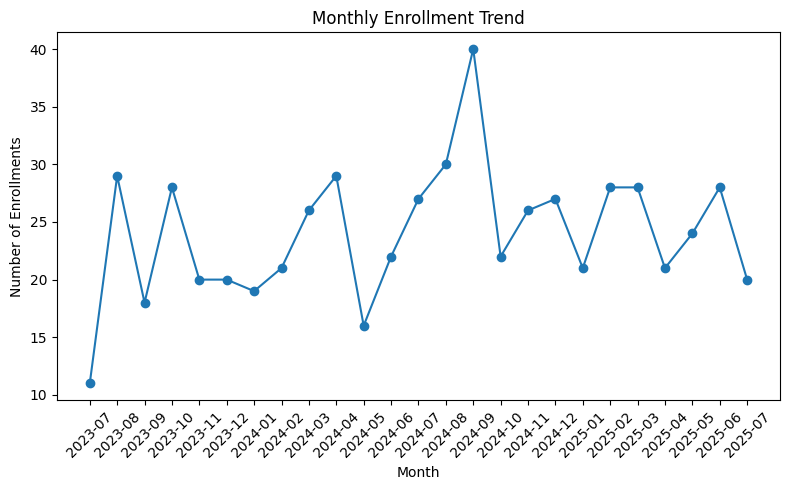

In [12]:
plt.figure(figsize=(8,5))
df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])
df_by_month = df.groupby(df['enrollment_date'].dt.to_period('M')).size().reset_index(name='count')
plt.plot(df_by_month['enrollment_date'].astype(str), df_by_month['count'], marker='o')
plt.title('Monthly Enrollment Trend')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

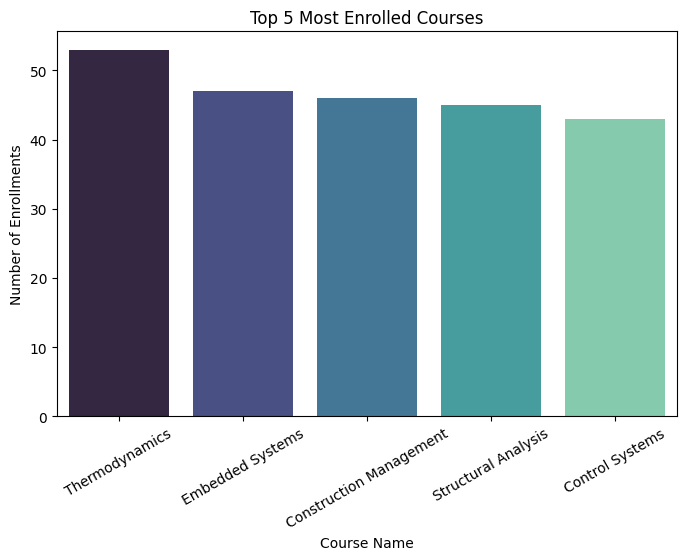

In [13]:
top_courses = df['course_name'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_courses.index, y=top_courses.values, palette='mako')
plt.title('Top 5 Most Enrolled Courses')
plt.xlabel('Course Name')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=30)
plt.show()

In [14]:
print("\n✅ KEY INSIGHTS:")
print("1. Department with highest student enrollment:", dep_count.idxmax())
print("2. Most offered course department:", course_count.idxmax())
print("3. Highest average grade department:", avg_grade.loc[avg_grade['grade_numeric'].idxmax(), 'student_department'])
print("4. Top enrolled course:", top_courses.index[0])


✅ KEY INSIGHTS:
1. Department with highest student enrollment: Electrical
2. Most offered course department: Mechanical
3. Highest average grade department: Computer Science
4. Top enrolled course: Thermodynamics
